<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/MST_Simberi_Mine_EDA_CSV_Aug_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

### MST Simberi Mine Load Summary

## Data Preparation

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files

import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans # Uncomment if required

In [2]:
# Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read dataset from CSV in Google Drive to Pandas Data Frame
data = pd.read_csv('drive/MyDrive/Colab_Data/DMR.csv', dtype={'StartLatLong': str, 'EndLatLong': str})
print(data.shape)
# data['ID'] = data['ID'].astype(int)
# data.set_index('ID', inplace=True)

(13620, 35)


In [4]:
data.head(3).transpose()

,0,1,2
AssetExtra,Simberi Bell B50D ADT D/Truck (AT499),Simberi Bell B50D ADT D/Truck (AT499),Simberi Bell B50D ADT D/Truck (AT499)
AssetHostID,AT499.,AT499.,AT499.
AssetID,23,23,23
SiteName,Tracking,Tracking,Tracking
DepartureDate,7/19/2022,7/19/2022,7/19/2022
AssetName2,Jeff Turi (Mining),Jeff Turi (Mining),Jeff Turi (Mining)
AssetExtra2,18042,18042,18042
FleetNumber,AT499,AT499,AT499
DepartureTime,12:21:10 AM,12:29:13 AM,12:47:04 AM
TimeZone1,ChST/PGT,ChST/PGT,ChST/PGT


In [5]:
data.describe(include=[object]).transpose()

,count,unique,top,freq
AssetExtra,13620,38,Simberi L/C 4Door (636),1247
AssetHostID,13620,38,LV636.,1247
SiteName,13620,1,Tracking,13620
DepartureDate,13620,30,7/31/2022,574
AssetName2,13620,186,Solomon Stanley (Mining),317
AssetExtra2,10220,152,15876,317
FleetNumber,13620,38,LV 636,1247
DepartureTime,13620,12555,12:13:39 AM,4
TimeZone1,13620,1,ChST/PGT,13620
DepartFrom,13620,132,Sorowar Go Line,1837


In [6]:
# Empty/NA cells
data.isnull().any()

AssetExtra                   False
AssetHostID                  False
AssetID                      False
SiteName                     False
DepartureDate                False
AssetName2                   False
AssetExtra2                   True
FleetNumber                  False
DepartureTime                False
TimeZone1                    False
DepartFrom                   False
StartLatLong                 False
TripType                     False
TripClassificationComment     True
DrivingTime                  False
StandingTime                 False
Duration                     False
Distance                     False
StartOdoMeter                False
EndOdoMeter                  False
MaxSpeed                     False
AvgSpeed                     False
ArrivalTime                  False
ArrivalDate                  False
TimeZone2                    False
ArriveAt                     False
EndLatLong                   False
NextDepartureDateTime         True
TimeZone            

In [7]:
# Drop no necessary columns
data.drop(columns=['SiteName','AssetExtra2','TimeZone1','TripType','TripClassificationComment','TimeZone2','NextDepartureDateTime','TimeZone','TimeAtLocation','PassengerList','BlankJourneyType','TotalFuelUsedMeasured','CalcFuelConsumption'], inplace=True)

In [8]:
# Drop rows with Empty/NA cells uncomment if required
data = data.dropna(axis=0)
print(data.shape)
data.isnull().any()

(13620, 22)


AssetExtra       False
AssetHostID      False
AssetID          False
DepartureDate    False
AssetName2       False
FleetNumber      False
DepartureTime    False
DepartFrom       False
StartLatLong     False
DrivingTime      False
StandingTime     False
Duration         False
Distance         False
StartOdoMeter    False
EndOdoMeter      False
MaxSpeed         False
AvgSpeed         False
ArrivalTime      False
ArrivalDate      False
ArriveAt         False
EndLatLong       False
NrOfVisits       False
dtype: bool

In [9]:
# Data Types
data.dtypes

AssetExtra        object
AssetHostID       object
AssetID            int64
DepartureDate     object
AssetName2        object
FleetNumber       object
DepartureTime     object
DepartFrom        object
StartLatLong      object
DrivingTime       object
StandingTime      object
Duration          object
Distance         float64
StartOdoMeter     object
EndOdoMeter       object
MaxSpeed           int64
AvgSpeed         float64
ArrivalTime       object
ArrivalDate       object
ArriveAt          object
EndLatLong        object
NrOfVisits         int64
dtype: object

In [10]:
# Describe Objects
data.describe(include=[object]).transpose()

,count,unique,top,freq
AssetExtra,13620,38,Simberi L/C 4Door (636),1247
AssetHostID,13620,38,LV636.,1247
DepartureDate,13620,30,7/31/2022,574
AssetName2,13620,186,Solomon Stanley (Mining),317
FleetNumber,13620,38,LV 636,1247
DepartureTime,13620,12555,12:13:39 AM,4
DepartFrom,13620,132,Sorowar Go Line,1837
StartLatLong,13620,4587,-2.62228 / 151.9964,176
DrivingTime,13620,4771,0:00:32,22
StandingTime,13620,2172,0:02:01,102


In [11]:
# Describe Numeric Values
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
AssetID,13620.0,63.69,45.88,8.0,25.00,35.00,115.00,137.00
Distance,13620.0,7.25,10.68,0.0,1.40,3.20,8.50,150.10
MaxSpeed,13620.0,33.64,11.35,0.0,26.00,36.00,42.00,71.00
AvgSpeed,13620.0,13.21,5.65,0.0,9.57,12.37,16.63,37.54
NrOfVisits,13620.0,1.76,2.30,1.0,1.00,1.00,2.00,43.00


count    13620.000000
mean         1.758150
std          2.299949
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         43.000000
Name: NrOfVisits, dtype: float64


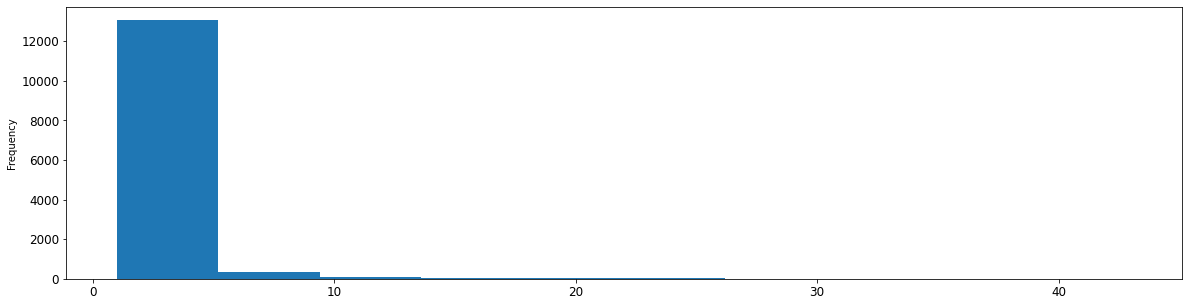

In [12]:
# Number of Visits Distribution is OK
print(data['NrOfVisits'].describe())
data['NrOfVisits'].plot.hist(figsize = [20, 5], fontsize = 12)

count    13620.000000
mean         7.249780
std         10.681528
min          0.000000
25%          1.400000
50%          3.200000
75%          8.500000
max        150.100000
Name: Distance, dtype: float64

# of zeros: 404


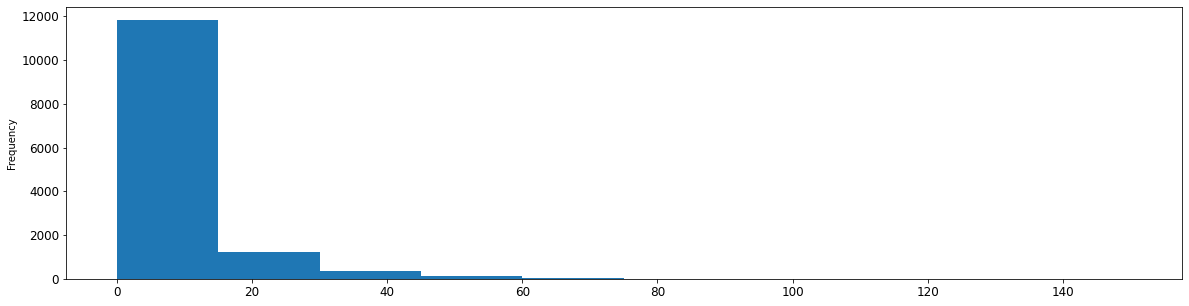

In [13]:
# Distance Distribution is OK, but too many zeros
print(data['Distance'].describe())
data['Distance'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[data['Distance']==0]))

In [14]:
# Duration doesn't contains negative values (No reset in this period)
print(data['Duration'].describe())


count       13620
unique       5393
top       0:10:19
freq           15
Name: Duration, dtype: object


count    13620.000000
mean        33.637812
std         11.349368
min          0.000000
25%         26.000000
50%         36.000000
75%         42.000000
max         71.000000
Name: MaxSpeed, dtype: float64


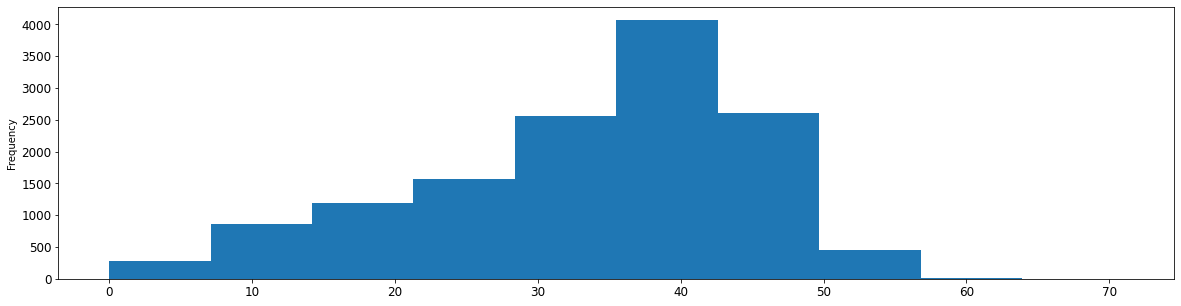

In [15]:
# Max Speed Distribution is OK
print(data['MaxSpeed'].describe())
data['MaxSpeed'].plot.hist(figsize = [20, 5], fontsize = 12)

count    13620.000000
mean        13.214208
std          5.646994
min          0.000000
25%          9.570000
50%         12.370000
75%         16.630000
max         37.540000
Name: AvgSpeed, dtype: float64

# of zeros: 408


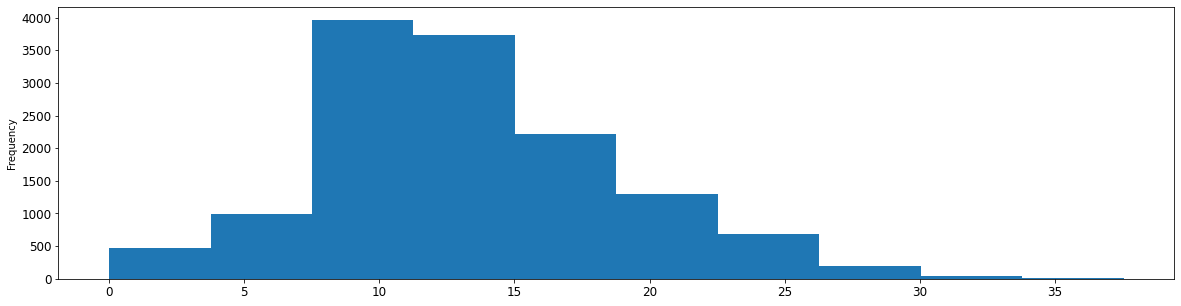

In [16]:
# Avg Speed is OK, but some zeros
print(data['AvgSpeed'].describe())
data['AvgSpeed'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[data['AvgSpeed']==0]))

In [17]:
# The OdoMeter Readings are not all numeric
print(data['EndOdoMeter'].str.isnumeric().value_counts())
print(data['StartOdoMeter'].str.isnumeric().value_counts())

False    13616
True         4
Name: EndOdoMeter, dtype: int64
False    13613
True         7
Name: StartOdoMeter, dtype: int64


In [18]:
# Replace commas and convert to Float
data['EndOdoMeter'] = data['EndOdoMeter'].replace(',','',regex=True)
data['EndOdoMeter'] = data['EndOdoMeter'].astype(float)
data['StartOdoMeter'] = data['StartOdoMeter'].replace(',','',regex=True)
data['StartOdoMeter'] = data['StartOdoMeter'].astype(float)

count     13620.000000
mean         36.832184
std        2438.073554
min           0.000000
25%           1.400000
50%           3.300000
75%           8.500000
max      201234.090000
dtype: float64

# of zeros: 391


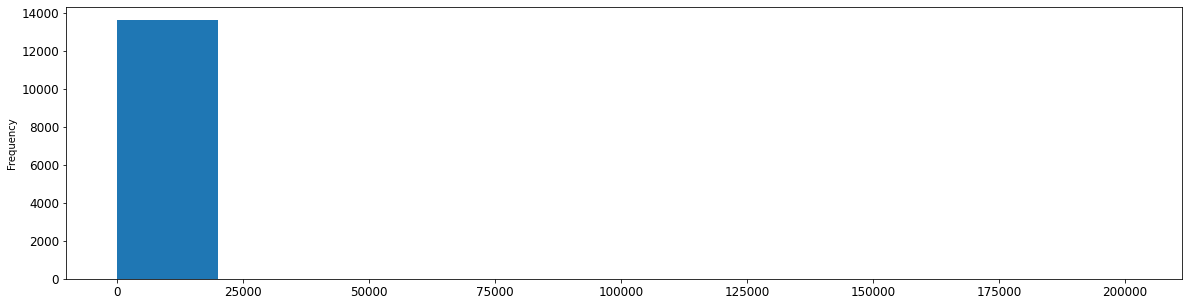

In [19]:
# OdoMeter Delta is not equal to Distance, too many zeros
print((data['EndOdoMeter'] - data['StartOdoMeter']).describe())
(data['EndOdoMeter'] - data['StartOdoMeter']).plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[(data['EndOdoMeter'] - data['StartOdoMeter'])==0]))

In [20]:
# Negative Values in the arrival time - departure time
data[(data['EndOdoMeter'] - data['StartOdoMeter']) > 150.5]

,AssetExtra,AssetHostID,AssetID,DepartureDate,AssetName2,FleetNumber,DepartureTime,DepartFrom,StartLatLong,DrivingTime,...,Distance,StartOdoMeter,EndOdoMeter,MaxSpeed,AvgSpeed,ArrivalTime,ArrivalDate,ArriveAt,EndLatLong,NrOfVisits
10318,SIMBERI HBS TEREX TA400 (AT024),AT024.,130,8/1/2022,Francis Lucas (HBS),AT024.,2:39:00 AM,Sorowar Go Line,-2.62233 / 151.9964,1:10:16,...,11.1,0.0,201184.30,37,9.48,3:35:38 AM,8/1/2022,Sorowar South Pit/95RL,-2.62533 / 152.0069,2
10319,SIMBERI HBS TEREX TA400 (AT024),AT024.,130,8/1/2022,Johnson Phil (HBS),AT024.,3:56:58 AM,Sorowar South Pit/95RL,-2.62525 / 152.0069,4:04:50,...,28.3,0.0,201234.09,45,6.94,5:42:37 AM,8/1/2022,Sorowar Go Line,-2.62267 / 151.9962,3


count                        13620
mean     0 days 00:04:55.178267254
std      0 days 02:36:00.077212344
min              -1 days +00:00:26
25%                0 days 00:04:54
50%                0 days 00:11:05
75%                0 days 00:24:31
max                0 days 05:35:33
dtype: object


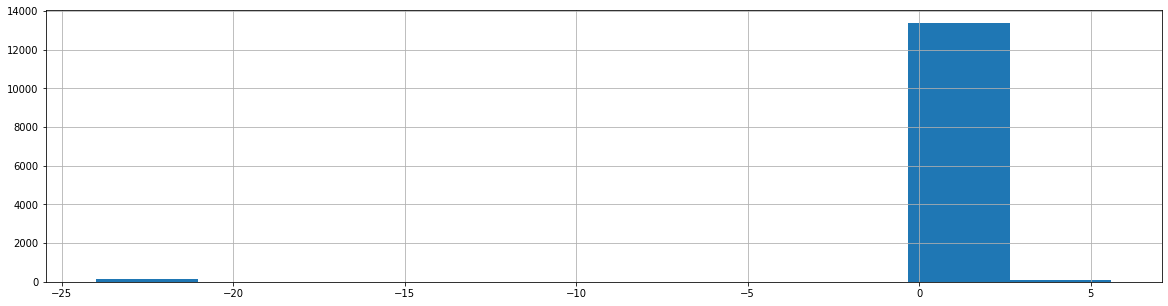

In [21]:
# Departure-Arrival Time Delta
timedelta = data['ArrivalTime'].astype(str).apply(pd.to_datetime) - data['DepartureTime'].astype(str).apply(pd.to_datetime)
print(timedelta.describe())
(timedelta.dt.total_seconds()/3600).hist(figsize = [20, 5])


In [22]:
# Concatenate the Departure Date plus the Departure Time
data['DepartureDateTime'] = pd.to_datetime(data['DepartureDate'].astype(str) + ' ' +data['DepartureTime'].astype(str))

# Concatenate the Arrival Date plus the Arrival Time
data['ArrivalDateTime'] = pd.to_datetime(data['ArrivalDate'].astype(str) + ' ' +data['ArrivalTime'].astype(str))

# Drop Original Columns
data = data.drop(columns=['DepartureDate','DepartureTime','ArrivalDate','ArrivalTime'])

count                        13620
mean     0 days 00:21:43.812628487
std      0 days 00:29:23.593558894
min              -1 days +23:58:01
25%                0 days 00:05:08
50%                0 days 00:11:21
75%                0 days 00:25:03
max                0 days 05:35:33
dtype: object

# of zeros: 16


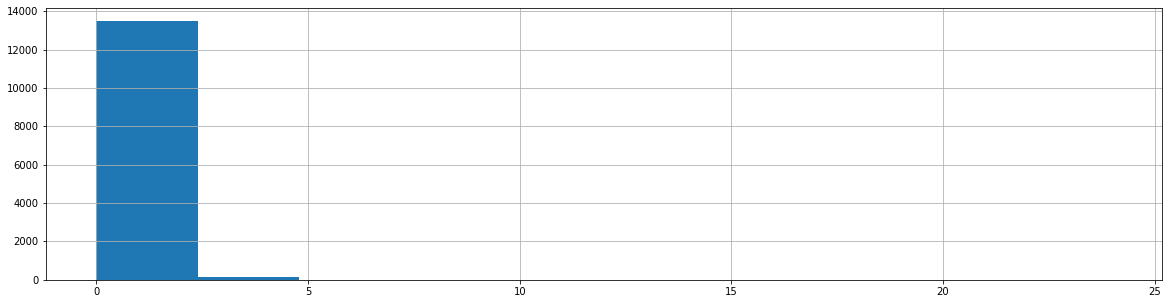

In [23]:
# Departure-Arrival Date Time Delta now makes sense but is still not equal to Duration
print((data['ArrivalDateTime'] - data['DepartureDateTime']).describe())
((data['ArrivalDateTime'] - data['DepartureDateTime']).dt.seconds/3600).hist(figsize = [20, 5])
print('\n# of zeros:', sum((data['ArrivalDateTime'] - data['DepartureDateTime']).dt.seconds==0))

In [24]:
# Negative Values in the arrival time - departure time
data[(data['ArrivalDateTime'] - data['DepartureDateTime']).dt.days==-1]

,AssetExtra,AssetHostID,AssetID,AssetName2,FleetNumber,DepartFrom,StartLatLong,DrivingTime,StandingTime,Duration,Distance,StartOdoMeter,EndOdoMeter,MaxSpeed,AvgSpeed,ArriveAt,EndLatLong,NrOfVisits,DepartureDateTime,ArrivalDateTime
7662,SIMBERI HBS TEREX TA400 (AT017),AT017.,125,Andy Angope (HBS),AT017,Sorowar Magazine,-2.62306 / 151.996,0:21:31,0:20:12,0:41:43,5.7,39175.5,39181.3,28,15.89,Sorowar South Knob/115 RL,-2.62439 / 152.0092,3,2022-07-30 05:57:42,2022-07-30 05:55:43


count                        13620
mean     0 days 00:32:27.367474302
std      0 days 00:46:28.569786727
min                0 days 00:00:00
25%                0 days 00:06:11
50%                0 days 00:14:35
75%         0 days 00:38:51.250000
max                0 days 09:31:56
Name: DrivingTime, dtype: object


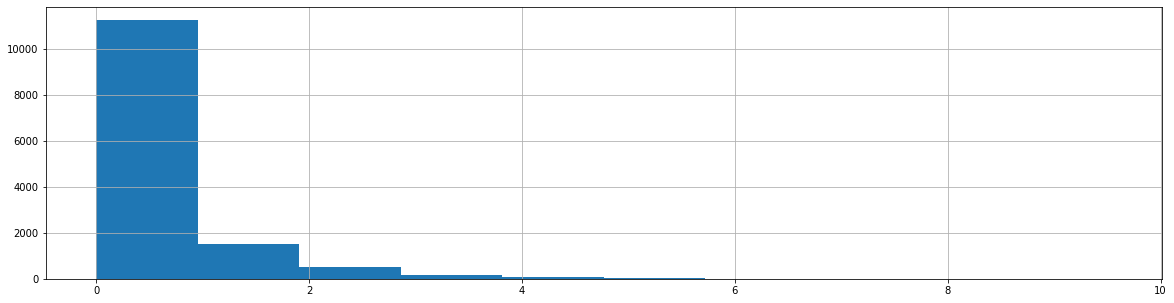

In [25]:
# Driving Time is close to Departure-Arrival Time Delta but not the same
data['DrivingTime'] = pd.to_timedelta(data['DrivingTime'].astype(str))
print(data['DrivingTime'].describe())
(data['DrivingTime'] .dt.total_seconds()/3600).hist(figsize = [20, 5])

count               13620
unique                132
top       Sorowar Go Line
freq                 1837
Name: DepartFrom, dtype: object


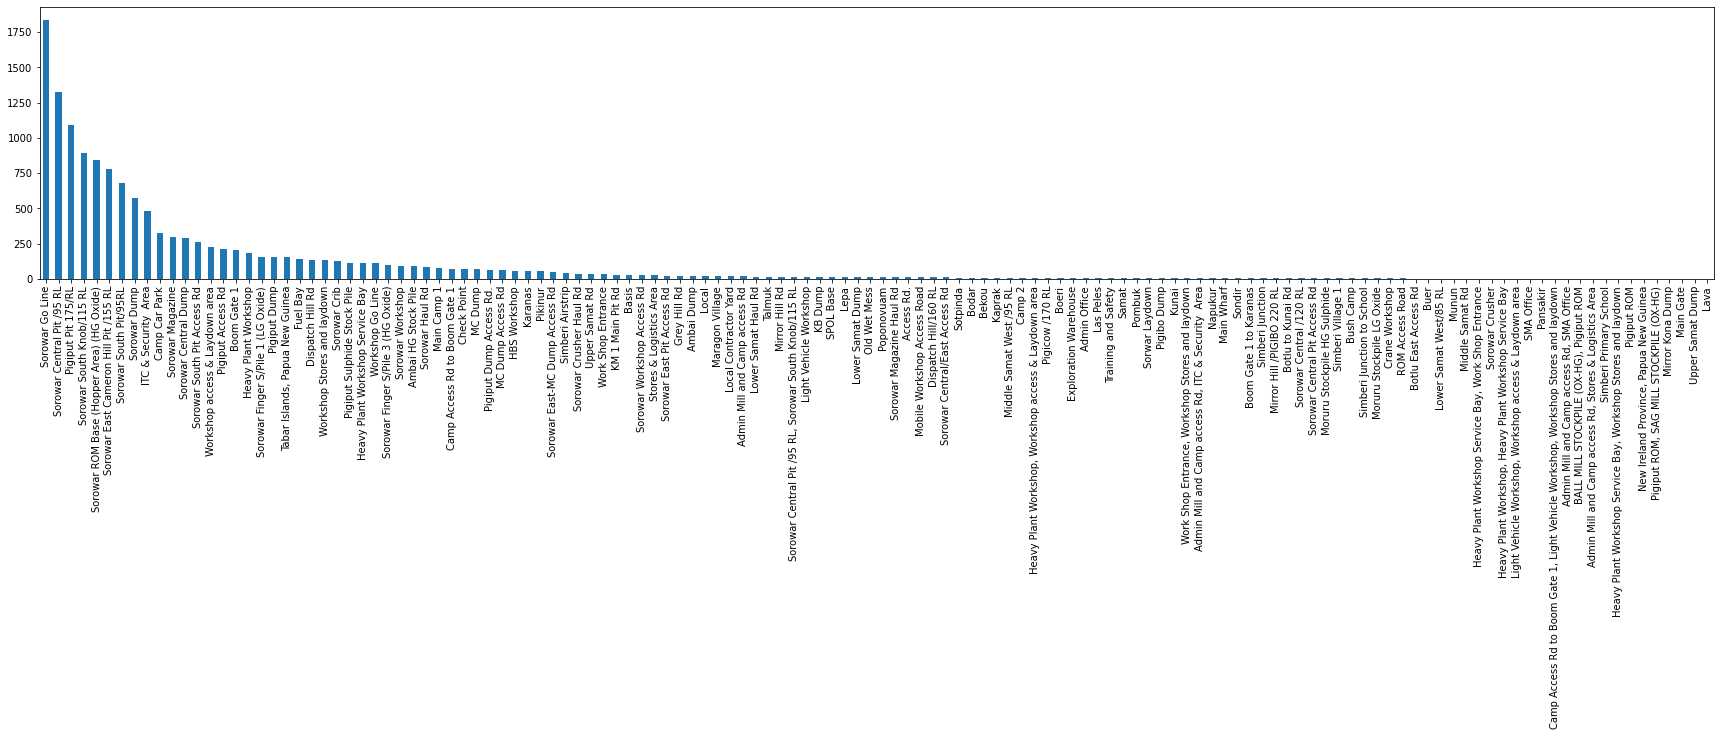

In [26]:
# Depart From Counts
print(data['DepartFrom'].describe())
data['DepartFrom'].value_counts().plot.bar(figsize = [30, 5], fontsize = 10)

count               13620
unique                128
top       Sorowar Go Line
freq                 1817
Name: ArriveAt, dtype: object


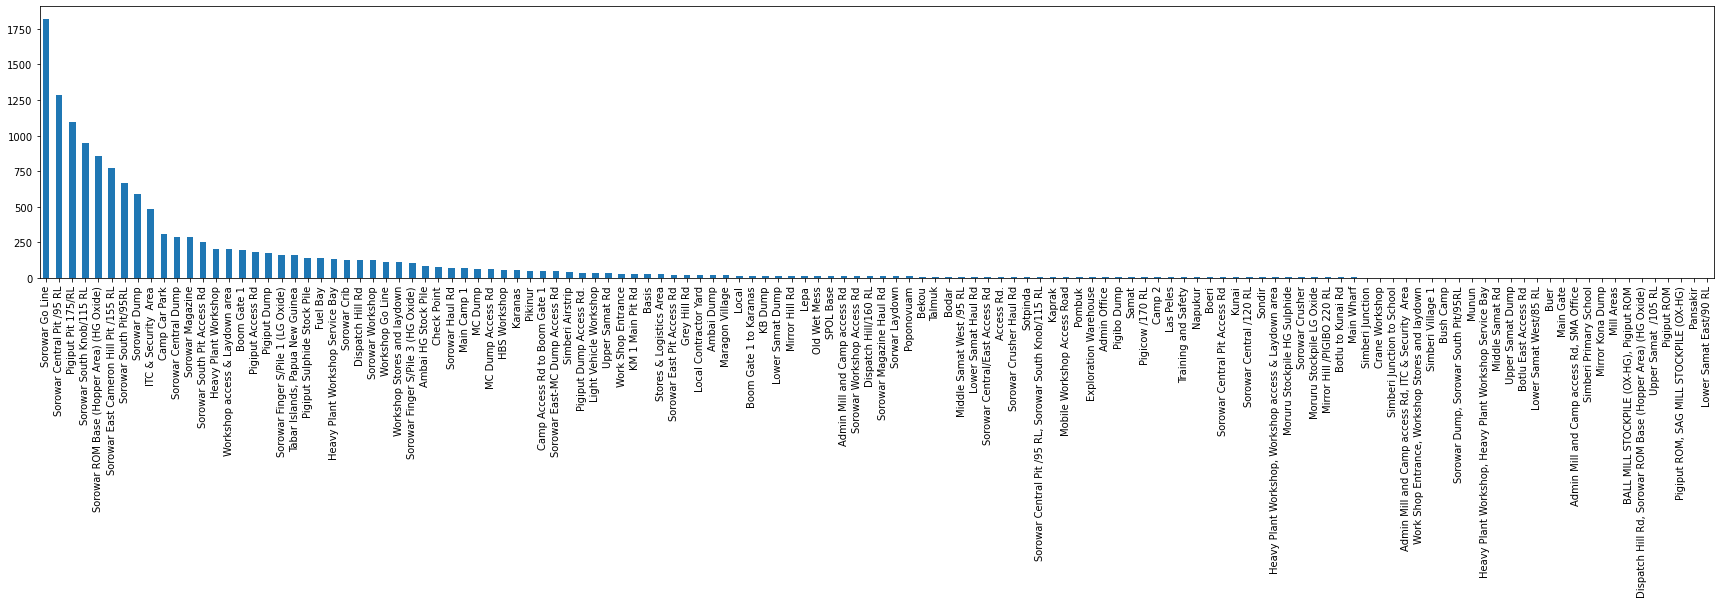

In [27]:
# Arrive At Counts
print(data['ArriveAt'].describe())
data['ArriveAt'].value_counts().plot.bar(figsize = [30, 5], fontsize = 10)

count                        13620
unique                         186
top       Solomon Stanley (Mining)
freq                           317
Name: AssetName2, dtype: object


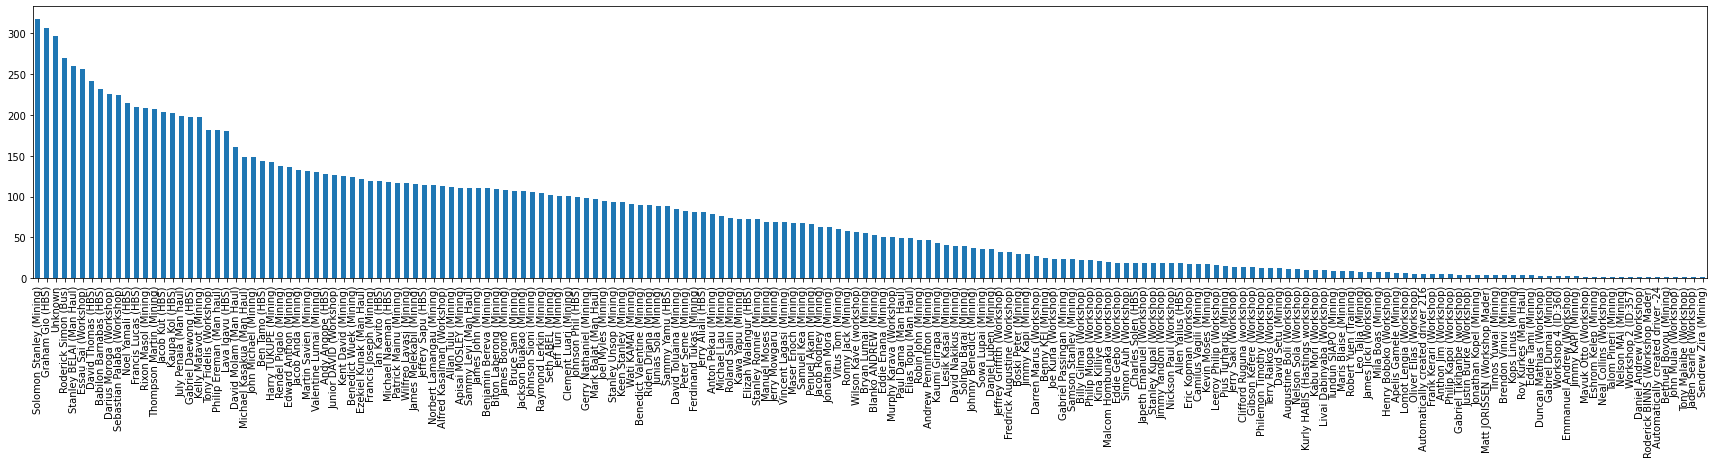

In [28]:
# Asset Counts
print(data['AssetName2'].describe())
data['AssetName2'].value_counts().plot.bar(figsize = [30, 5], fontsize = 10)

In [29]:
# Assets Usage
data[['FleetNumber','AssetName2','Distance']].groupby(by=['FleetNumber','AssetName2']).sum()

Distance
FleetNumber AssetName2                        
AT017       Allen Yailus (HBS)            64.5
            Andy Angope (HBS)            649.0
            Babilon Barnabas (HBS)       280.4
            Ben Tamo (HBS)               113.7
            David Thomas (HBS)            41.9
...                                        ...
LV 636      Solomon Stanley (Mining)    1450.9
            Thompson Martin (Mining)     883.6
            Timos Yuwai (Mining)          23.8
            Tundun SIAPO (Mining)         36.3
            Unknown                      178.9

[997 rows x 1 columns]

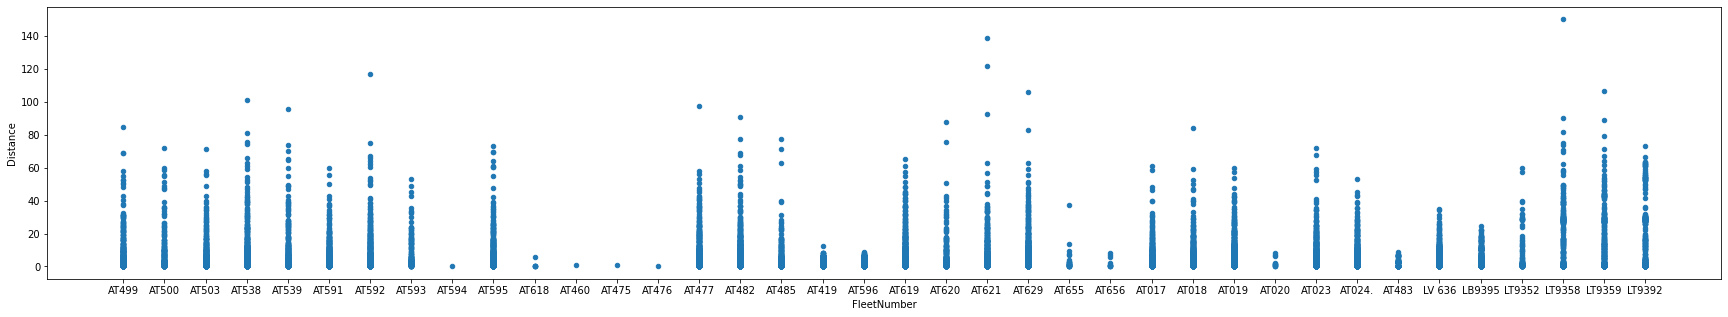

In [30]:
data.plot.scatter('FleetNumber','Distance', figsize = [30, 5])

In [31]:
data['FleetNumber'].value_counts().to_frame()

,FleetNumber
LV 636,1247
AT023,755
AT024.,752
AT019,697
AT596,672
AT419,552
AT629,542
LB9395,530
AT482,528
AT018,505


In [32]:
# Some distances have a wide range
data[['DepartFrom','ArriveAt','Distance']].groupby(['DepartFrom','ArriveAt']).describe()



Distance  \
                                                                                  count   
DepartFrom                     ArriveAt                                                   
Access Rd.                     Camp Car Park                                        1.0   
                               Pigiput Pit 175/RL                                   3.0   
                               Sorowar Central Pit /95 RL                           1.0   
                               Sorowar Go Line                                      4.0   
                               Sorowar South Pit/95RL                               1.0   
...                                                                                 ...   
Workshop access & Laydown area Stores & Logistics Area                              2.0   
                               Work Shop Entrance                                   3.0   
                               Work Shop Entrance, Workshop Stores and laydown      1.0   
                               Workshop Go Line                                    19.0   
                               Workshop Stores and laydown                         13.0   

                                                                                           \
                                                                                     mean   
DepartFrom                     ArriveAt                                                     
Access Rd.                     Camp Car Park                                     7.200000   
                               Pigiput Pit 175/RL                                2.700000   
                               Sorowar Central Pit /95 RL                       13.000000   
                               Sorowar Go Line                                   6.875000   
                               Sorowar South Pit/95RL                           10.900000   
...                                                                                   ...   
Workshop access & Laydown area Stores & Logistics Area                           1.800000   
                               Work Shop Entrance                                0.066667   
                               Work Shop Entrance, Workshop Stores and laydown   0.000000   
                               Workshop Go Line                                  0.394737   
                               Workshop Stores and laydown                       0.276923   

                                                                                          \
                                                                                     std   
DepartFrom                     ArriveAt                                                    
Access Rd.                     Camp Car Park                                         NaN   
                               Pigiput Pit 175/RL                               3.386739   
                               Sorowar Central Pit /95 RL                            NaN   
                               Sorowar Go Line                                  3.499881   
                               Sorowar South Pit/95RL                                NaN   
...                                                                                  ...   
Workshop access & Laydown area Stores & Logistics Area                          0.424264   
                               Work Shop Entrance                               0.115470   
                               Work Shop Entrance, Workshop Stores and laydown       NaN   
                               Workshop Go Line                                 0.248269   
                               Workshop Stores and laydown                      0.700183   

                                                                                      \
                                                                                 min   
DepartFrom                     Arriv

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


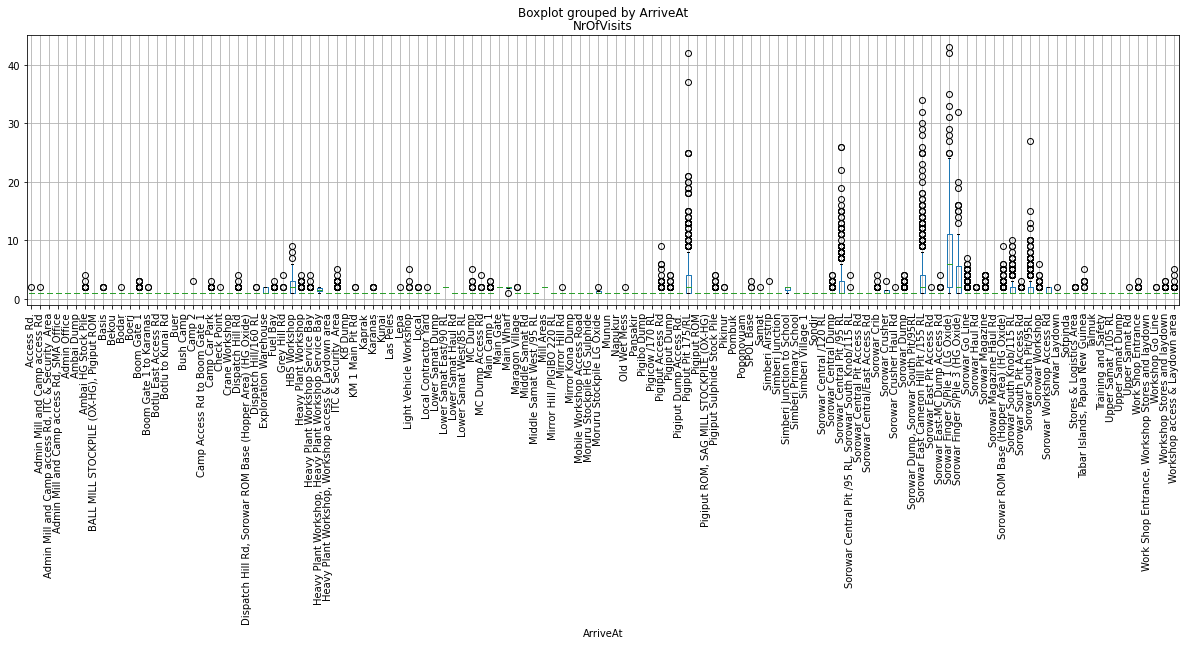

In [33]:
# Number of Visits per Site/Category
data.boxplot('NrOfVisits','ArriveAt', figsize = [20, 5], fontsize = 10, rot=90)

In [34]:
# Split Location Data into Latitude and Longitude and convert to float type (numeric)
data[['StartLat','StartLon']] = data['StartLatLong'].str.split(' / ', 1, expand=True)
data[['StartLat','StartLon']] = data[['StartLat','StartLon']].astype("float")
data[['EndLat','EndLon']] = data['EndLatLong'].str.split(' / ', 1, expand=True)
data[['EndLat','EndLon']] = data[['EndLat','EndLon']].astype("float")
# Drop Original Columns
data = data.drop(columns=['StartLatLong','EndLatLong'])

In [35]:
# Range of Location coordinates grouped by DepartFrom are too wide
(data[['DepartFrom','AssetName2','StartLat','StartLon']].groupby(['DepartFrom','AssetName2']).min() - data[['DepartFrom','AssetName2','StartLat','StartLon']].groupby(['DepartFrom','AssetName2']).max()).sort_values('StartLon')

StartLat  StartLon
DepartFrom                      AssetName2                                    
Tabar Islands, Papua New Guinea Philip Ereman (Man haul)    -0.05147   -0.0798
                                Roderick Simon (Bus)        -0.02252   -0.0366
                                Ezekiel Kunak (Man Haul)    -0.04845   -0.0335
                                Kelly Matavot (Mining)      -0.01370   -0.0237
                                Ferdinand Tukas (Mining)    -0.02305   -0.0226
...                                                              ...       ...
Pigiput Sulphide Stock Pile     Jacob Kut (HBS)              0.00000    0.0000
                                Jackson Buakao (Mining)      0.00000    0.0000
                                Gabriel Passingan (Mining)   0.00000    0.0000
Sorowar Magazine                Allen Yailus (HBS)          -0.00003    0.0000
Workshop access & Laydown area  Wilson Kave (workshop)       0.00000    0.0000

[2730 rows x 2 columns]

In [36]:
# Range of Location coordinates grouped by DepartFrom are too wide
(data[['ArriveAt','AssetName2','EndLat','EndLon']].groupby(['ArriveAt']).min() - data[['ArriveAt','EndLat','EndLon']].groupby(['ArriveAt']).max()).sort_values('EndLon')

,AssetName2,EndLat,EndLon
ArriveAt,,,
"Tabar Islands, Papua New Guinea",NaN,-0.06322,-0.0833
Botlu to Kunai Rd,NaN,-0.00139,-0.0130
Poponovuam,NaN,-0.01083,-0.0115
Lepa,NaN,-0.00211,-0.0100
Kunai,NaN,-0.00536,-0.0100
...,...,...,...
"Sorowar Dump, Sorowar South Pit/95RL",NaN,0.00000,0.0000
Main Gate,NaN,0.00000,0.0000
Lower Samat East/90 RL,NaN,0.00000,0.0000


## Data Reduction

In [55]:
# Reduce the dataset as required 

day = 1 # Reduce to first day of the month only
day_data = data[data['DepartureDateTime'].dt.day==day]

fleet='AT023'
day_data = day_data[day_data['FleetNumber']==fleet]

# Drop unnecessary columns 
day_data = day_data.drop(columns=['StandingTime','Duration','DrivingTime','Duration','MaxSpeed','AvgSpeed'])

# Rename remaining columns
day_data = day_data.rename(columns={'AssetName2':'DriverName'})

# Reorder and Re-index the columns
#day_data = day_data.reindex(columns=['',''])

day_data.head()

,AssetExtra,AssetHostID,AssetID,DriverName,FleetNumber,DepartFrom,Distance,StartOdoMeter,EndOdoMeter,ArriveAt,NrOfVisits,DepartureDateTime,ArrivalDateTime,StartLat,StartLon,EndLat,EndLon
9501,SIMBERI HBS TEREX TA400 (AT023),AT023.,129,Babilon Barnabas (HBS),AT023,Sorowar Central Pit /95 RL,2.7,6878.9,6881.6,Sorowar Go Line,1,2022-08-01 00:33:40,2022-08-01 00:48:59,-2.62353,152.0090,-2.62231,151.9964
9502,SIMBERI HBS TEREX TA400 (AT023),AT023.,129,Jacob Kut (HBS),AT023,Sorowar Go Line,2.3,6881.7,6884.0,Sorowar South Pit/95RL,1,2022-08-01 00:56:21,2022-08-01 01:07:37,-2.62233,151.9964,-2.62519,152.0087
9503,SIMBERI HBS TEREX TA400 (AT023),AT023.,129,Jacob Kut (HBS),AT023,Sorowar South Knob/115 RL,3.8,6884.0,6887.8,Sorowar South Pit/95RL,1,2022-08-01 01:10:04,2022-08-01 01:29:04,-2.62508,152.0087,-2.62517,152.0088
9504,SIMBERI HBS TEREX TA400 (AT023),AT023.,129,Jacob Kut (HBS),AT023,Sorowar South Pit/95RL,3.8,6887.9,6891.7,Sorowar South Knob/115 RL,1,2022-08-01 01:32:50,2022-08-01 01:50:54,-2.62517,152.0087,-2.62506,152.0086
9505,SIMBERI HBS TEREX TA400 (AT023),AT023.,129,Jacob Kut (HBS),AT023,Sorowar South Pit/95RL,7.7,6891.7,6899.5,Sorowar South Knob/115 RL,2,2022-08-01 01:53:42,2022-08-01 02:12:40,-2.62519,152.0086,-2.62511,152.0089


In [57]:
# Save the reduced dataset to an Excel Spreadsheet
day_data.to_excel('Simberi_day_data.xlsx', sheet_name='daily')
!cp Simberi_day_data.xlsx "/content/drive/My Drive/Colab_Data/"

In [59]:
# Install necessary Libraries, uncomment if required
!pip install folium
import folium # map rendering library
from folium import plugins
import matplotlib.cm as cm
import matplotlib.colors as colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
# Create a new Dataframe for Unique Origin Location
origins = day_data[['FleetNumber','StartLat','StartLon']].groupby(['FleetNumber','StartLat','StartLon']).mean().reset_index()
origins

,FleetNumber,StartLat,StartLon
0,AT023,-2.63886,152.0200
1,AT023,-2.63886,152.0210
2,AT023,-2.62667,152.0066
3,AT023,-2.62664,152.0064
4,AT023,-2.62600,152.0072
5,AT023,-2.62525,152.0087
6,AT023,-2.62525,152.0088
7,AT023,-2.62525,152.0089
8,AT023,-2.62522,152.0089
9,AT023,-2.62519,152.0086


In [61]:
# Create a new Dataframe for Unique Destinations
destinations = day_data[['FleetNumber','AssetID','EndLat','EndLon','ArrivalDateTime']].groupby(['FleetNumber','AssetID','EndLat','EndLon','ArrivalDateTime']).count().reset_index()
destinations

,FleetNumber,AssetID,EndLat,EndLon,ArrivalDateTime
0,AT023,129,-2.63892,152.0210,2022-08-01 11:04:17
1,AT023,129,-2.63831,152.0201,2022-08-01 05:01:21
2,AT023,129,-2.62667,152.0065,2022-08-01 15:05:53
3,AT023,129,-2.62664,152.0063,2022-08-01 14:24:50
4,AT023,129,-2.62528,152.0088,2022-08-01 16:06:25
5,AT023,129,-2.62528,152.0089,2022-08-01 21:22:09
6,AT023,129,-2.62528,152.0089,2022-08-01 22:20:36
7,AT023,129,-2.62525,152.0087,2022-08-01 17:04:13
8,AT023,129,-2.62519,152.0087,2022-08-01 01:07:37
9,AT023,129,-2.62519,152.0088,2022-08-01 14:17:07


In [62]:
# create a Simberi mine map using latitude and longitude values from destinations
map_simberi = folium.Map(location=[-2.628,	152], zoom_start=13.5)

# add red markers to map for destinations
for lat, lon, id, dest in zip(destinations['EndLat'], destinations['EndLon'], destinations['FleetNumber'], destinations['ArrivalDateTime']):
    label = '{},{}'.format(id, dest)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_opacity = 1,
        parse_html=False).add_to(map_simberi)

# add blue markers to map for origins
for lat, lon, id in zip(origins['StartLat'], origins['StartLon'], origins['FleetNumber']):
    label = '{},{}'.format(id, dest)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity = 0,
        parse_html=False).add_to(map_simberi)    
 
map_simberi

In [63]:
# create another Simberi mine map using latitude and longitude values from destinations
map_simberi2 = folium.Map(location=[-2.628,	152], zoom_start=13.5)

# set color scheme for the asset IDs
ids = destinations.AssetID.unique()
ys = [i + ids + (i*ids)**2 for i in range(len(ids))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add rainbow of markers to the map for asset ids
markers_colors = []
for lat, lon, id, dest in zip(destinations['EndLat'], destinations['EndLon'], destinations['AssetID'], destinations['ArrivalDateTime']):
    label = '{}, {}'.format(id, dest)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(np.where(ids == id)[0])],
        fill=True,
        fill_color=rainbow[int(np.where(ids == id)[0])],
        fill_opacity = 1,
        parse_html=False).add_to(map_simberi2)

folium.PolyLine(destinations[['EndLat','EndLon']],color=rainbow[int(np.where(ids == id)[0])]).add_to(map_simberi2)   

map_simberi2

## Driving Performance

In [64]:
# Read dataset from CSV in Google Drive to Pandas Data Frame
DDPR_data = pd.read_csv('drive/MyDrive/Colab_Data/DDPR.csv')
print(DDPR_data.shape)
DDPR_data.head(3).transpose()

(1659, 30)


,0,1,2
StartDate,2022-07-20,2022-07-20,2022-07-21
AssetName,Simberi Bell B50D ADT D/Truck (AT499),Simberi Bell B50D ADT D/Truck (AT499),Simberi Bell B50D ADT D/Truck (AT499)
SiteName,Tracking,Fatigue,Tracking
ReportingGroup,"All Simberi, Dump Trucks",All Simberi,"All Simberi, Dump Trucks"
Distance,56.5,37.6,120.4
Duration,06:39:07,06:43:29,15:36:07
OverSpeedingScore,100.0,100.0,100.0
OverSpeedingOccurences,0,0,0
OverSpeedingMax,45,45,48
OverSpeedingDuration,00:00:00,00:00:00,00:00:00


In [65]:
DDPR_data.describe(include=[object]).transpose()

,count,unique,top,freq
StartDate,1659,30,2022-07-22,63
AssetName,1659,45,Simberi L/C 4Door (636),60
SiteName,1659,2,Fatigue,889
ReportingGroup,1351,2,All Simberi,856
Duration,1659,1633,21:07:51,2
OverSpeedingDuration,1659,46,00:00:00,1538
OverRevvingDuration,1659,1,00:00:00,1659
HarshAccelerationDuration,1659,3,00:00:00,1648
HarshBrakingDuration,1659,22,00:00:00,1615
ExcessiveIdleDuration,1659,310,00:00:00,1319


In [66]:
# Empty/NA cells
DDPR_data.isnull().any()

StartDate                                  False
AssetName                                  False
SiteName                                   False
ReportingGroup                              True
Distance                                   False
Duration                                   False
OverSpeedingScore                          False
OverSpeedingOccurences                     False
OverSpeedingMax                            False
OverSpeedingDuration                       False
OverRevvingScore                           False
OverRevvingOccurences                      False
OverRevvingMax                             False
OverRevvingDuration                        False
HarshAccelerationScore                     False
HarshAccelerationOccurences                False
HarshAccelerationMax                       False
HarshAccelerationDuration                  False
HarshBrakingScore                          False
HarshBrakingOccurences                     False
HarshBrakingMax     

In [67]:
# Drop no necessary columns
DDPR_data.drop(columns=['ReportingGroup','OverRevvingDuration'], inplace=True)

In [68]:
# Describe Numeric Values
DDPR_data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Distance,1659.0,115.38,84.35,0.10,31.15,118.9,183.70,413.40
OverSpeedingScore,1659.0,99.72,3.14,12.46,100.00,100.0,100.00,100.00
OverSpeedingOccurences,1659.0,0.18,0.81,0.00,0.00,0.0,0.00,10.00
OverSpeedingMax,1659.0,41.41,15.88,2.00,40.00,46.0,49.00,251.00
OverRevvingScore,1659.0,100.00,0.00,100.00,100.00,100.0,100.00,100.00
OverRevvingOccurences,1659.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
OverRevvingMax,1659.0,1285.35,2144.87,0.00,0.00,0.0,2300.00,8200.00
HarshAccelerationScore,1659.0,99.21,4.79,55.02,100.00,100.0,100.00,100.00
HarshAccelerationOccurences,1659.0,1.65,11.27,0.00,0.00,0.0,0.00,154.00
HarshAccelerationMax,1659.0,5.26,2.44,0.00,4.00,5.0,6.00,18.00


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


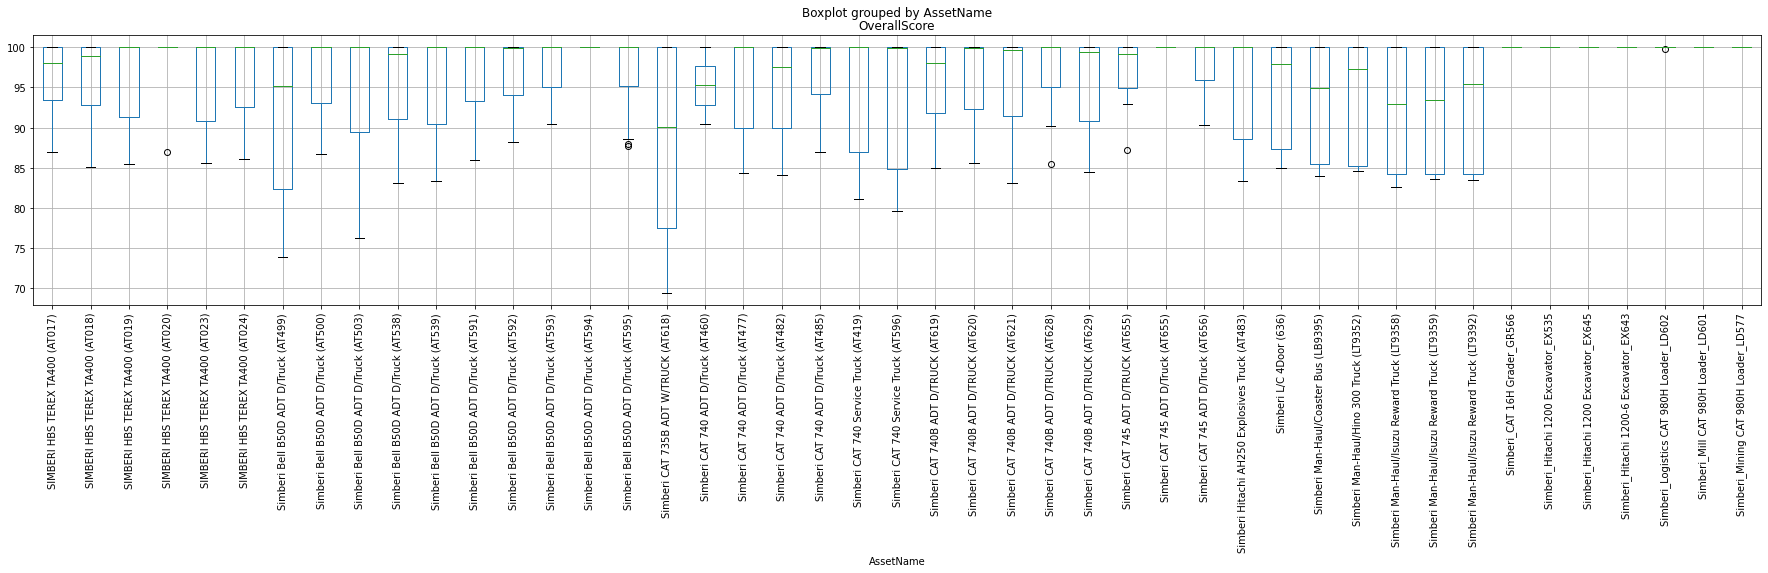

In [69]:
# Number of Visits per Site/Category
DDPR_data.boxplot('OverallScore','AssetName', figsize = [30, 5], fontsize = 10, rot=90)

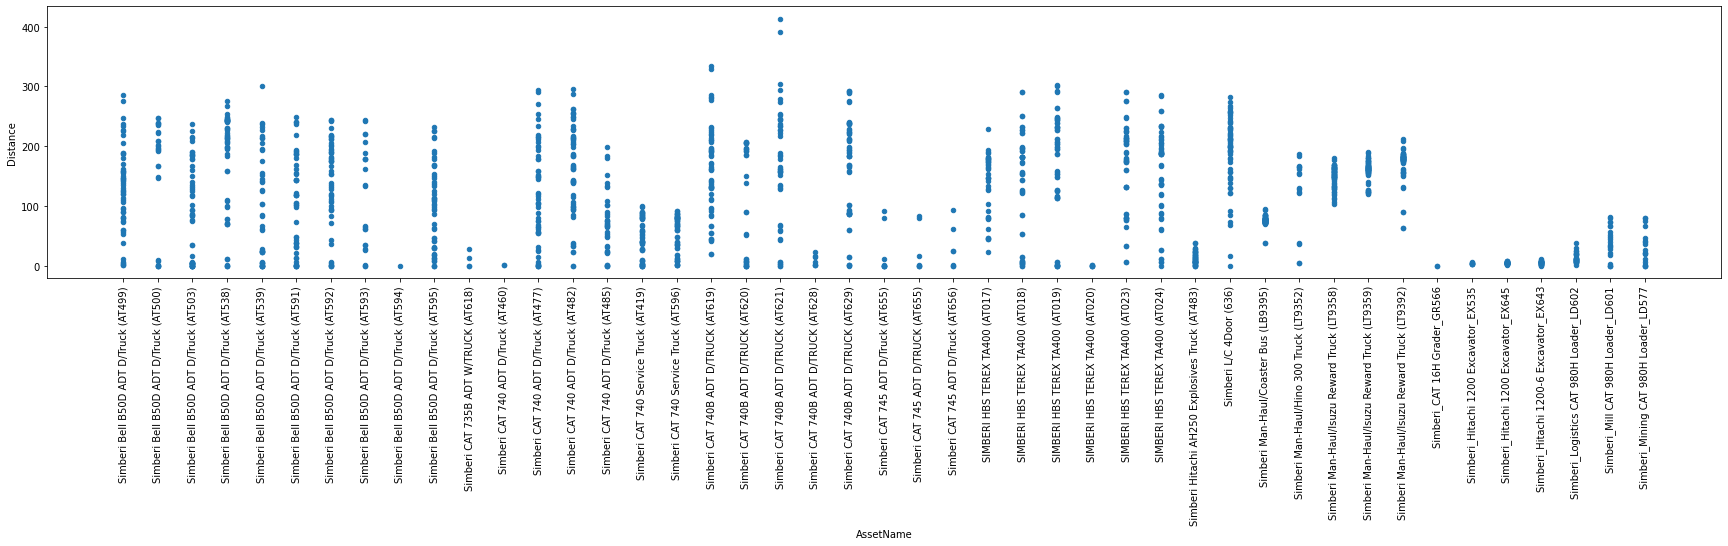

In [70]:
DDPR_data.plot.scatter('AssetName','Distance', figsize = [30, 5],fontsize = 10, rot=90)